In [ ]:
# Problem Definition
# Given tweets about six US airlines, the task is to predict whether a tweet contains positive, negative, or neutral sentiment 
# about the airline. This is a typical supervised learning task where given a text string, 
# we have to categorize the text string into predefined categories.

In [2]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_source_url = r"https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

In [29]:
airline_tweets['negativereason'].isnull()
#a. Dropping Missing Values
airline_tweets.dropna()
from numpy import NaN
#b. Replacing Missing Values
airline_tweets.replace({NaN:0.00})
#c. Replacing with a Scalar Value
airline_tweets.fillna(7)

# d. Filling Forward or Backward
# If we supply a method parameter to the fillna() method, we can fill forward or backward as we need. 
# To fill forward, use the methods pad or fill, and to fill backward, use bfill and backfill.

airline_tweets.fillna(method='backfill')

airline_tweets.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [30]:
# Data Analysis
# Let's explore the dataset a bit to see if we can find any trends. But before that,
# we will change the default plot size to have a better view of the plots. 
# Execute the following script:

plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

8.0
6.0


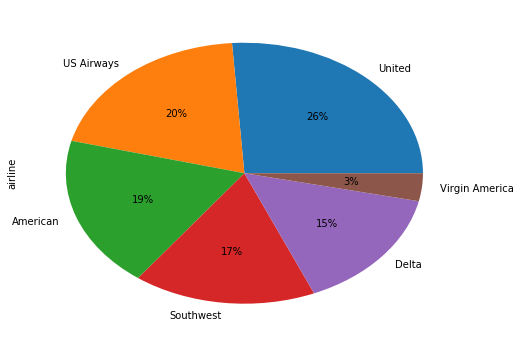

In [31]:
#Let's first see the number of tweets for each airline. We will plot a pie chart for that:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')



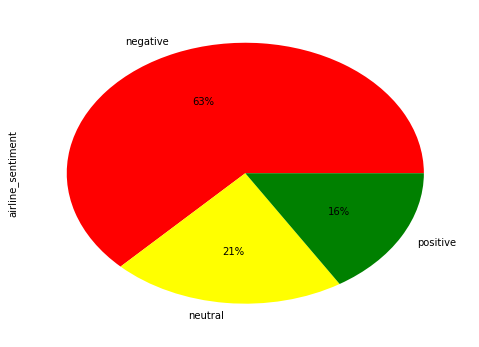

In [32]:
# Let's now see the distribution of sentiments across all the tweets. Execute the following script:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

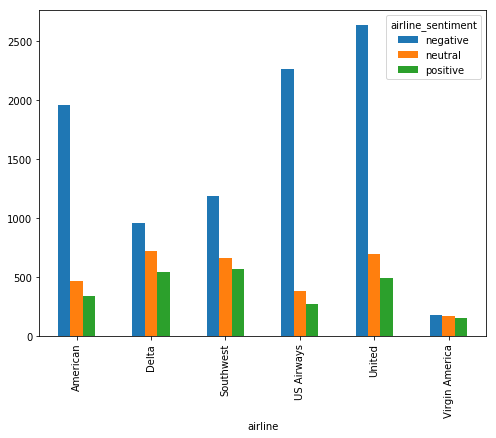

In [33]:
# Next, let's see the distribution of sentiment for each individual airline,

airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

C:\Users\Vijayakumar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


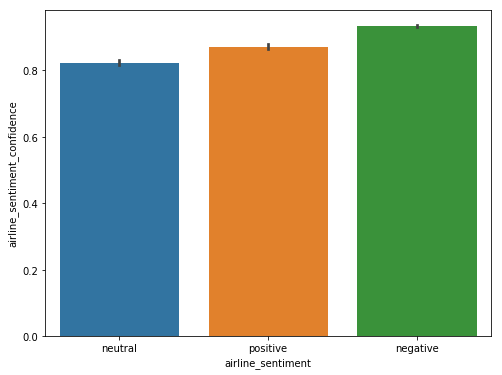

In [35]:
# Finally, let's use the Seaborn library to view the average confidence level for the tweets belonging to three sentiment
# categories. Execute the following script:

import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)